# Proyecto Individual 2

## EDA
Primero defino los 3 KPIs que voy a buscar

### KPIs:
1. Aumentar la velocidad media de conexión a Internet en las provincias del interior del pais en un 30% en el próximo año. (4T 2022)
2. Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia. (3T 2023)
3. Aumentar el uso de tecnología wireless en un 20% en el próximo año. (4T 2022)

Despues empiezo importando las librerias que voy a usar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #Esto lo hago para evitar que se muestren avisos de warning y asi la lectura sea mas simple
warnings.simplefilter(action='ignore', category=UserWarning)

## ETL

Cargo todos los archivos que voy a usar y comienzo con las transformaciones

Empezando por Accesos por Velocidad

In [2]:
acc_velocidad = pd.read_csv('data/Accesos por velocidad.csv', thousands=',', decimal='.')
acc_velocidad.columns = acc_velocidad.columns.str.strip()
acc_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  960 non-null    int64  
 1   Trimestre            960 non-null    int64  
 2   Provincia            960 non-null    object 
 3   HASTA 512 kbps       960 non-null    int64  
 4   + 512 Kbps - 1 Mbps  960 non-null    int64  
 5   + 1 Mbps - 6 Mbps    960 non-null    int64  
 6   + 6 Mbps - 10 Mbps   960 non-null    int64  
 7   + 10 Mbps - 20 Mbps  960 non-null    int64  
 8   + 20 Mbps - 30 Mbps  960 non-null    int64  
 9   + 30 Mbps            960 non-null    int64  
 10  OTROS                954 non-null    float64
 11  Total                960 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 90.1+ KB


Al ver la informacion de Accesos por velocidad noto que hay unos valores faltantes en la columna OTROS  
Como no considero que sean importantes para lo que busco lo lleno con 0

Y ademas saco los valores nulos de la columna Provincia

In [3]:
acc_velocidad[acc_velocidad['OTROS'].isna()]
acc_velocidad['OTROS'].fillna(0,inplace=True)
acc_velocidad.dropna(subset=['Provincia'],inplace=True)

Revisando me di cuenta de que tiene unos valores en la columna Año son 2024 que yo creo son un error y deberian ser 2023 ya que habla del 4to trimestre asi que lo corrijo.

In [4]:
acc_velocidad.head()
acc_velocidad['Año'] = acc_velocidad['Año'].replace(2024, 2023)

Cargo el archivo de Totales Accesos Por Tecnologia y elimino la columna Periodo ya que muestra la misma informacion que Trimestre y Año

In [5]:
tot_acc_tec = pd.read_csv('data/Totales Accesos Por Tecnología.csv', thousands=',', decimal='.')
tot_acc_tec.columns= tot_acc_tec.columns.str.strip() # Hago un strip ya que los nombres de las columnas tienen espacios al principio y final
tot_acc_tec.drop(columns='Periodo',inplace=True)

Y por ultimo cargo los ultimos tres archivos en los que solo tengo que hacer un strip en los nombres de las columnas.

In [6]:
tot_acc_vel = pd.read_csv('data/Totales Accesos por velocidad.csv', thousands=',', decimal='.')
tot_acc_vel.columns= tot_acc_vel.columns.str.strip()

vel_prov = pd.read_csv('data/Velocidad % por prov.csv', thousands=',', decimal='.')
vel_prov.columns= vel_prov.columns.str.strip()

penetracion_pob = pd.read_csv('data/Penetración-poblacion.csv', thousands=',', decimal='.')
penetracion_pob.columns= penetracion_pob.columns.str.strip()
penetracion_pob['Provincia'] = penetracion_pob['Provincia'].str.strip() #En esta tambien hago un strip en los nombres de las Provincias ya que hay algunas que parecen duplicadas por algunos espacios al final  y/o al principio

Verifico si hay NA en los DFs

In [7]:
print(acc_velocidad.isna().sum())
print(tot_acc_tec.isna().sum())
print(tot_acc_vel.isna().sum())
print(vel_prov.isna().sum())
print(penetracion_pob.isna().sum())

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  0
Total                  0
dtype: int64
Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64
Año                        0
Trimestre                  0
Hasta 512 kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
OTROS                      0
Total                      0
dtype: int64
Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64
Año                         0
Trimestre                   0
Provincia    

Y ahora busco los outliers y los saco de los DFs

In [8]:
# Tomo solo los valores sin outliers en las diferentes DFs
for col in acc_velocidad.iloc[:,3:].columns:
    Q1 = acc_velocidad[col].quantile(0.25)
    Q3 = acc_velocidad[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    acc_velocidad_NO = acc_velocidad[(acc_velocidad[col] >= lower_bound) & (acc_velocidad[col] <= upper_bound)]

In [9]:
for col in tot_acc_tec.iloc[:,2:].columns:
    Q1 = tot_acc_tec[col].quantile(0.25)
    Q3 = tot_acc_tec[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    tot_acc_tec_NO = tot_acc_tec[(tot_acc_tec[col] >= lower_bound) & (tot_acc_tec[col] <= upper_bound)]

In [10]:
for col in tot_acc_vel.iloc[:,2:].columns:
    Q1 = tot_acc_vel[col].quantile(0.25)
    Q3 = tot_acc_vel[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    tot_acc_vel_NO = tot_acc_vel[(tot_acc_vel[col] >= lower_bound) & (tot_acc_vel[col] <= upper_bound)]

vel_prov_NO = vel_prov.copy() # En este df no saco los outliers ya que estos son solamente los valores de 2023 y me quedan los graficos incompletos

col = 'Accesos por cada 100 hab'
Q1 = penetracion_pob[col].quantile(0.25)
Q3 = penetracion_pob[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
penetracion_pob_NO = penetracion_pob[(penetracion_pob[col] >= lower_bound) & (penetracion_pob[col] <= upper_bound)]

Ahora busco si tienen valores duplicados

In [11]:
dup_acc_velocidad_NO = acc_velocidad_NO[acc_velocidad_NO.duplicated()]
dup_tot_acc_tec_NO = tot_acc_tec_NO[tot_acc_tec_NO.duplicated()]
dup_tot_acc_vel_NO = tot_acc_vel_NO[tot_acc_vel_NO.duplicated()]
dup_vel_prov_NO = vel_prov_NO[vel_prov_NO.duplicated()]
dup_penetracion_pob_NO = penetracion_pob_NO[penetracion_pob_NO.duplicated()]

print(f'Duplicados de acc_velocidad_NO: {len(dup_acc_velocidad_NO)}\nDuplicados de tot_acc_tec_NO: {len(dup_tot_acc_tec_NO)}\nDuplicados de tot_acc_vel_NO: {len(dup_tot_acc_vel_NO)}\nDuplicados de vel_prov_NO: {len(dup_vel_prov_NO)}\nDuplicados de penetracion_pob_NO: {len(dup_penetracion_pob_NO)}')

Duplicados de acc_velocidad_NO: 0
Duplicados de tot_acc_tec_NO: 0
Duplicados de tot_acc_vel_NO: 0
Duplicados de vel_prov_NO: 0
Duplicados de penetracion_pob_NO: 0


## Analisis

Tomo de cada DF solamente los valores que me van a servir para explorar los KPIs

In [12]:
vel_prov_NO_Analisis = vel_prov_NO[(~vel_prov_NO['Provincia'].isin(['Buenos Aires', 'Capital Federal'])) & (vel_prov_NO['Año']<=2022)] #Aca solo tomo los valores que no sean Capital o Buenos Aires ya que busco el interior del pais
penetracion_pob_NO_Analisis = penetracion_pob_NO[penetracion_pob_NO['Año']<=2023]
tot_acc_tec_NO_Analisis = tot_acc_tec_NO[tot_acc_tec_NO['Año']<=2022] # Aca tomo solamente los valores de antes de 2023 para saber como se comporto la tecnologia Wireless en el pasado y asi sacar conclusiones para el futuro

Chequeo cuanto han cambiado en % el promedio de bajada en cada año

In [13]:
avg_mbps_por_anio = vel_prov_NO_Analisis.groupby('Año')['Mbps (Media de bajada)'].mean().reset_index() # Primero agrupo todo por año y saco el promedio

avg_mbps_por_anio.sort_values(by='Año', inplace=True) # Ahora lo ordeno por año

avg_mbps_por_anio['Cambio %'] = avg_mbps_por_anio['Mbps (Media de bajada)'].pct_change() * 100 # Creo una columna en la que cargo el cambio % que hay en cada año

avg_mbps_por_anio['Cambio %'].fillna(0, inplace=True) # Relleno los NA con 0 (El primer año tiene NA ya que no hay un valor anterior a este)

avg_mbps_por_anio # Lo muestro

,Año,Mbps (Media de bajada),Cambio %
0,2014,3.331136,0.000000
1,2015,4.043523,21.385686
2,2016,4.646818,14.920046
3,2017,6.010682,29.350484
4,2018,8.992045,49.601089
5,2019,12.598523,40.107418
6,2020,19.290568,53.117700
7,2021,25.359318,31.459675
8,2022,40.326136,59.019009


En el df que hice podemos ver como se aumenta entre un 15% y un 60% cada año asi que un 30% me parece correcto ademas venimos de un año con demasiada mejora

Empiezo con graficar las velocidades promedio en las provincias durante los años

C:\Users\biott\AppData\Local\Temp\ipykernel_9572\2969010338.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Provincia')


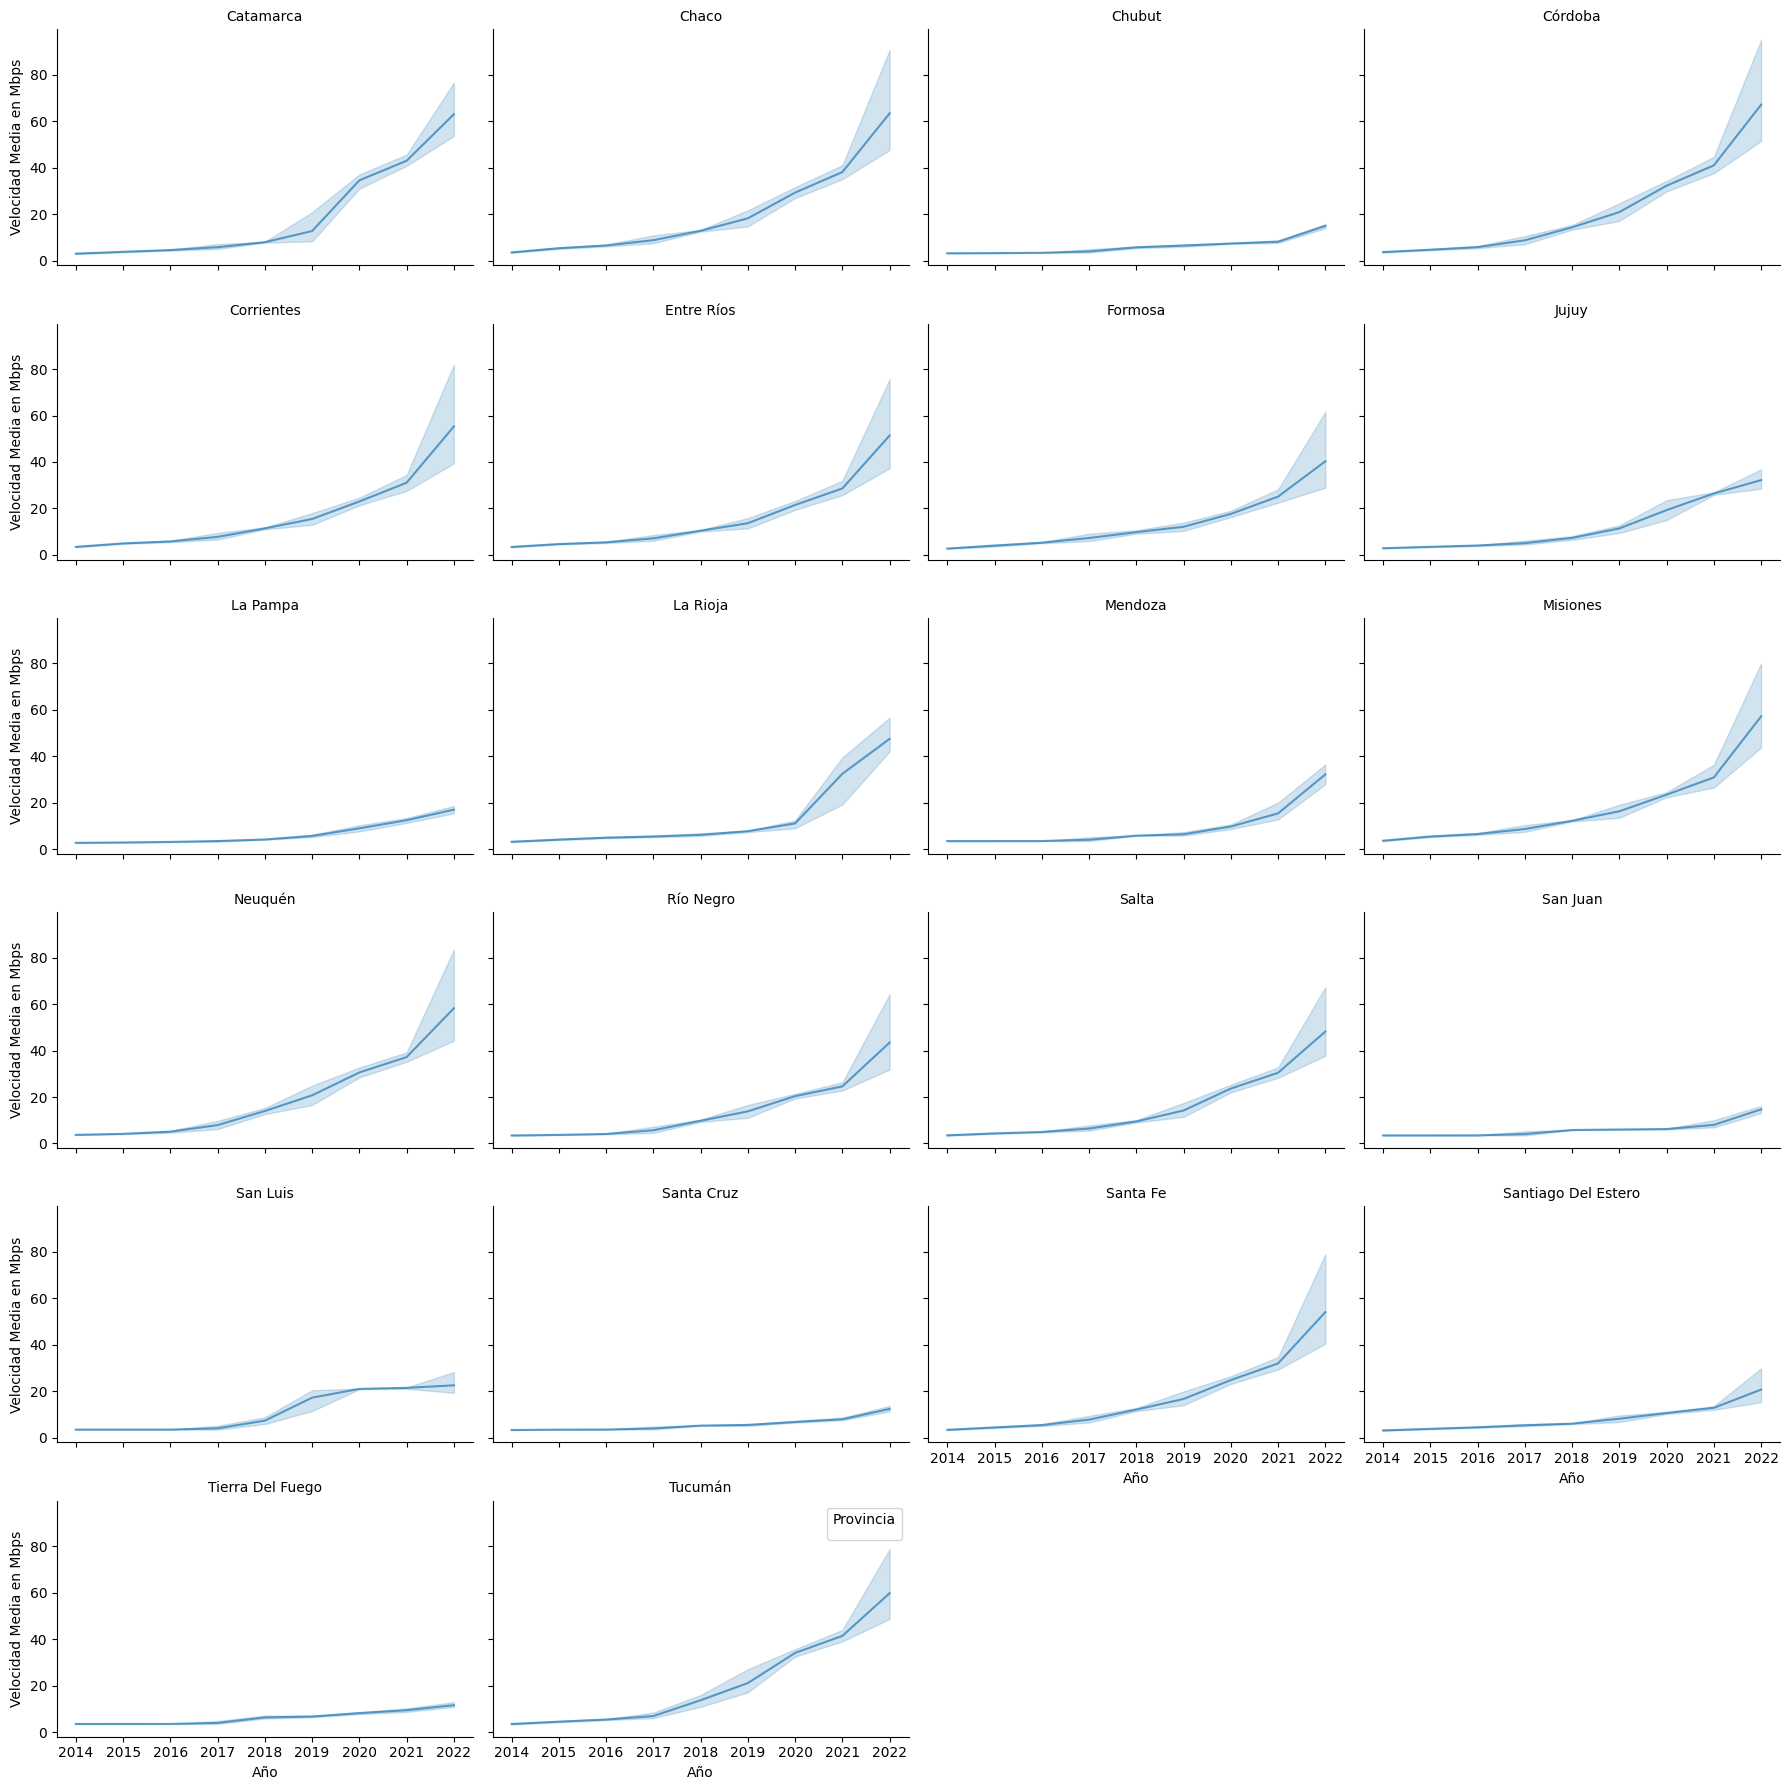

In [14]:
g1 = sns.FacetGrid(vel_prov_NO_Analisis, col='Provincia', col_wrap=4, height=3, aspect=1.5)
g1.map(sns.lineplot, 'Año', 'Mbps (Media de bajada)', alpha=0.7)
g1.set_titles('{col_name}')
g1.set_axis_labels('Año', 'Velocidad Media en Mbps')
plt.subplots_adjust(top=0.9)
plt.legend(title='Provincia')
plt.tight_layout()
plt.show()

Verifico como se comporto el acceso al servicio de Internet en los ultimos años

C:\Users\biott\AppData\Local\Temp\ipykernel_9572\940792040.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Provincia')


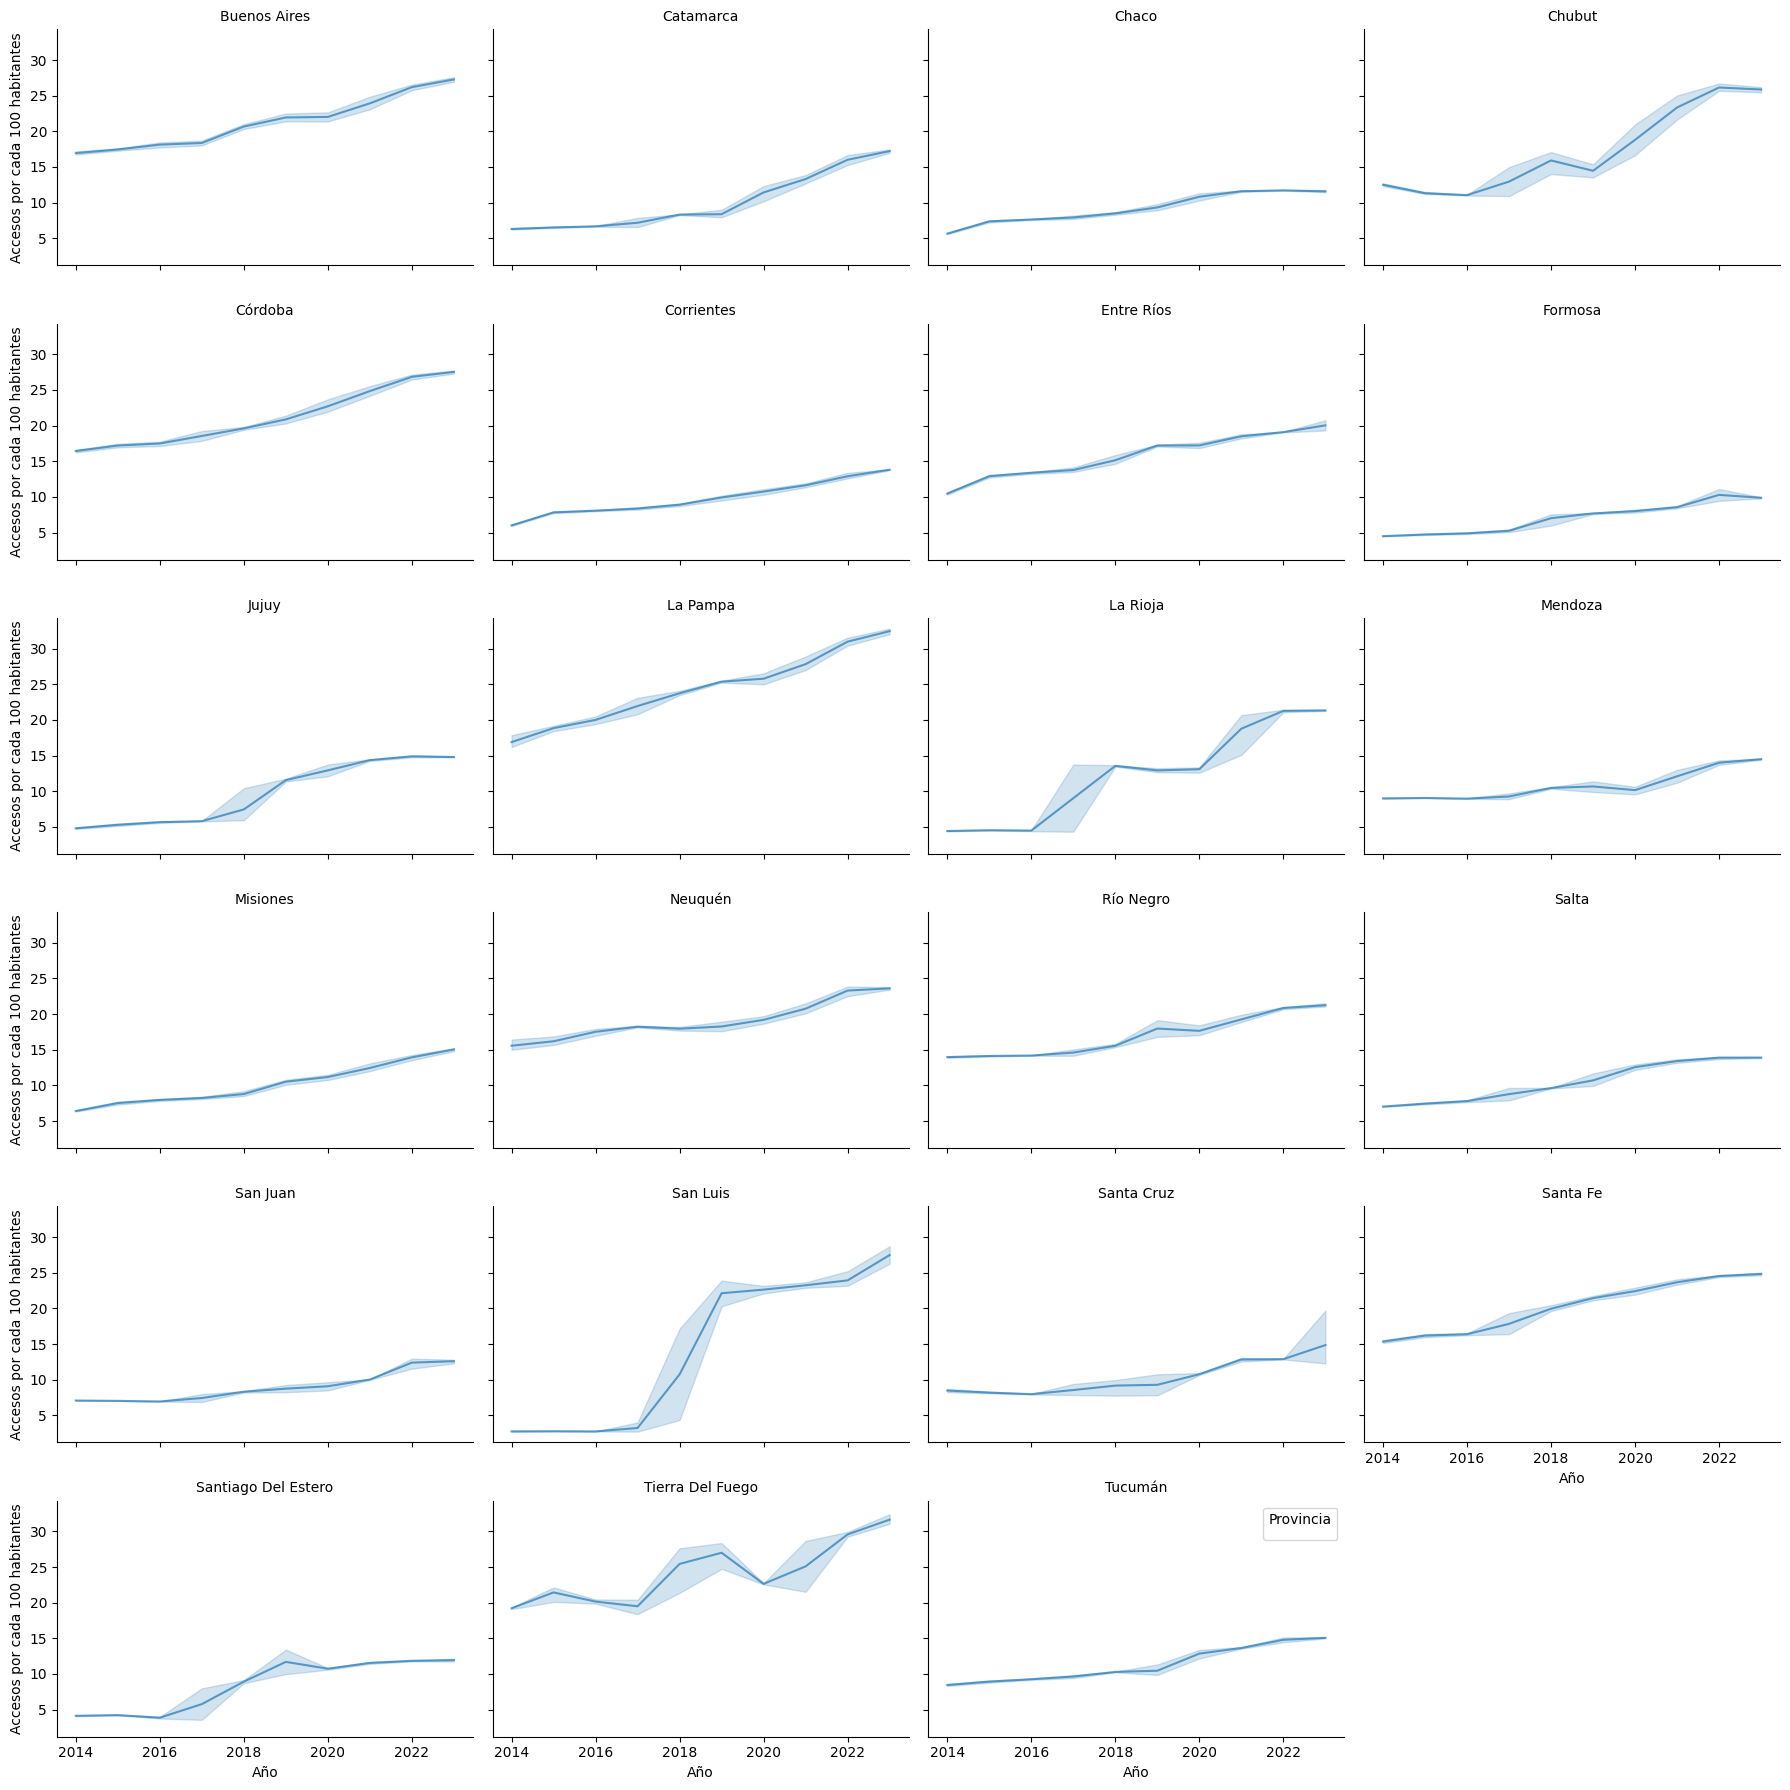

In [15]:
penetracion_pob_NO_Analisis.head()
g = sns.FacetGrid(penetracion_pob_NO_Analisis, col='Provincia', col_wrap=4, height=3, aspect=1.5)
g.map(sns.lineplot, 'Año', 'Accesos por cada 100 hab', alpha=0.7)
g.set_titles('{col_name}')
g.set_axis_labels('Año', 'Accesos por cada 100 habitantes')
plt.subplots_adjust(top=0.9)
plt.legend(title='Provincia')
plt.tight_layout()
plt.show()

Verifico como aumento en el tiempo previo a 2022 la tecnología Wireless

In [16]:
wireless_por_anio = tot_acc_tec_NO_Analisis.groupby('Año')['Wireless'].mean().reset_index() # Primero agrupo todo por año y saco el promedio

wireless_por_anio.sort_values(by='Año', inplace=True) # Ahora lo ordeno por año

wireless_por_anio['Cambio %'] = wireless_por_anio['Wireless'].pct_change() * 100 # Creo una columna en la que cargo el cambio % que hay en cada año

wireless_por_anio['Cambio %'].fillna(0, inplace=True) # Relleno los NA con 0 (El primer año tiene NA ya que no hay un valor anterior a este)

wireless_por_anio # Lo muestro

,Año,Wireless,Cambio %
0,2014,76308.50,0.000000
1,2015,82857.75,8.582596
2,2016,84349.00,1.799771
3,2017,108211.00,28.289606
4,2018,217511.75,101.007060
5,2019,315707.75,45.145147
6,2020,390953.25,23.833910
7,2021,481759.50,23.226882
8,2022,558034.00,15.832485


Viendo los aumentos que tuvo la tecnologia wireless creo que para finales de 2023 tendria que aumentar un 20% mas

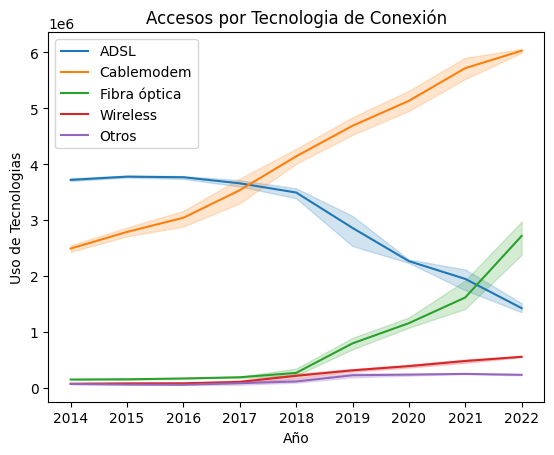

In [17]:
sns.lineplot(data= tot_acc_tec_NO_Analisis, x= 'Año', y= 'ADSL', label='ADSL')
sns.lineplot(data= tot_acc_tec_NO_Analisis, x= 'Año', y= 'Cablemodem', label='Cablemodem')
sns.lineplot(data= tot_acc_tec_NO_Analisis, x= 'Año', y= 'Fibra óptica', label='Fibra óptica')
sns.lineplot(data= tot_acc_tec_NO_Analisis, x= 'Año', y= 'Wireless', label='Wireless')
sns.lineplot(data= tot_acc_tec_NO_Analisis, x= 'Año', y= 'Otros', label='Otros')
plt.title('Accesos por Tecnologia de Conexión')
plt.ylabel('Uso de Tecnologias')
plt.show()

Por ultimo cargo los valores que necesito para chequear los KPIs

In [18]:
kpi_1 = vel_prov_NO[~vel_prov_NO['Provincia'].isin(['Buenos Aires', 'Capital Federal'])]

In [19]:
kpi_2 = penetracion_pob_NO[(penetracion_pob_NO['Año'] >= 2023) & (penetracion_pob_NO['Trimestre'] >= 3)]

In [20]:
kpi_3 = tot_acc_tec_NO[tot_acc_tec_NO['Año']>= 2022].iloc[:5]

Ahora guardo los datos que me van a ayudar a corroborar mis KPIs en archivos

In [21]:
kpi_1.to_csv('data_kpi/kpi_1.csv')
kpi_2.to_csv('data_kpi/kpi_2.csv')
kpi_3.to_csv('data_kpi/kpi_3.csv')

Y guardo tambien los datos sin outliers para usar en mi analisis de Power BI

In [22]:
vel_prov_NO.to_csv('data/vel_prov_NO.csv')
penetracion_pob_NO.to_csv('data/penetracion_pob_NO.csv')
tot_acc_tec_NO.to_csv('data/tot_acc_tec_NO.csv')

Y ahora empiezo a chequear si se cumplieron o no los KPIs planteados usando Power BI